In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 인천

In [2]:
kangsu_incheon = pd.read_csv('인천.csv',skiprows=7,encoding='cp949')
kangsu_kunsan = pd.read_csv('군산.csv',skiprows=7,encoding='cp949')

In [3]:
## 년도별 평균 데이터
kangsu_incheon['year'] = kangsu_incheon['년월'].apply(lambda x: x.split('-')[0])
kangsu_incheon['year']=kangsu_incheon['year'].astype('int')  

In [4]:
kangsu_incheon = kangsu_incheon[kangsu_incheon['year'] >= 2019]
kangsu_incheon.reset_index(inplace = True, drop = True)

In [5]:
incheon=pd.read_csv('incheon.csv')
kunsan=pd.read_csv('kunsan.csv')

In [6]:
incheon['강수량'] = kangsu_incheon['강수량(mm)']

In [121]:
incheon['수온'] = incheon['mean']

In [7]:
incheon[['강수량','mean']].corr()

,강수량,mean
강수량,1.000000,0.647211
mean,0.647211,1.000000


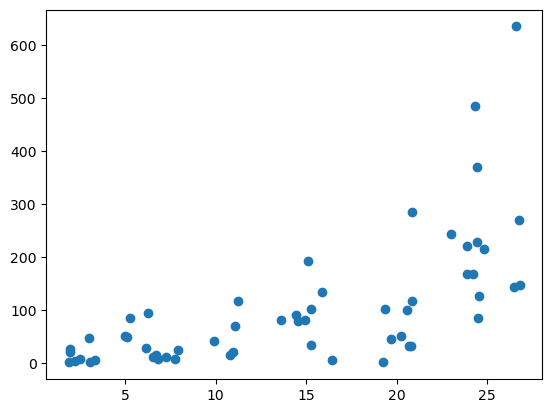

In [8]:
plt.scatter(incheon['mean'],incheon['강수량'])
plt.show()

In [87]:
incheon_kion = pd.read_csv('인천_기온.csv',skiprows=7,encoding='cp949')

In [17]:
#2023년 8월 결측치 대체
incheon_kion[incheon_kion['년월'].str.contains('08')]['평균최고기온(℃)'].mean()

28.575

In [22]:
incheon['기온']=incheon_kion['평균최고기온(℃)'].fillna(incheon_kion[incheon_kion['년월'].str.contains('08')]['평균최고기온(℃)'].mean())

In [25]:
incheon[['mean','기온']].corr()

,mean,기온
mean,1.000000,0.944807
기온,0.944807,1.000000


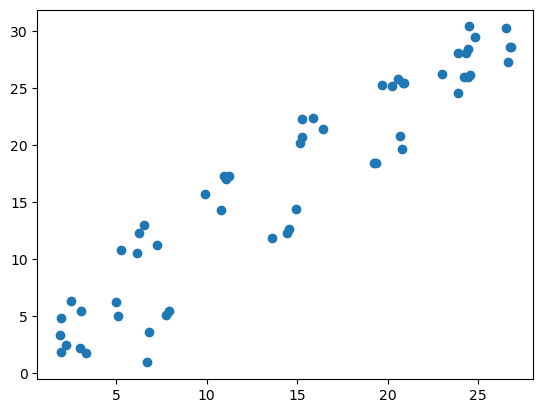

In [26]:
plt.scatter(incheon['mean'],incheon['기온'])
plt.show()

In [122]:
incheon[['수온','기온','강수량']].corr()

,수온,기온,강수량
수온,1.000000,0.944807,0.647211
기온,0.944807,1.000000,0.621228
강수량,0.647211,0.621228,1.000000


In [29]:
import statsmodels.api as sm

In [70]:
X = sm.add_constant(incheon[['강수량','기온']])

In [73]:
X = sm.add_constant(incheon[['강수량','기온']])
model = sm.OLS(incheon['mean'], X)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     234.8
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.60e-27
Time:                        09:55:37   Log-Likelihood:                -133.47
No. Observations:                  56   AIC:                             272.9
Df Residuals:                      53   BIC:                             279.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5766      0.758      0.761      0.450      -0.944       2.097
강수량            0.0066      0.004      1.758      0.084      -0.001       0.014
기온             0.7843      0.050     15.833      0.000       0.685       0.884
==============================================================================
Omnibus:                        8.537   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.885
Skew:                           0.153   Prob(JB):                        0.236
Kurtosis:                       1.931   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
model1 = sm.OLS(incheon['강수량'],sm.add_constant(incheon['수온']))

In [130]:
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    강수량   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     38.92
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           7.04e-08
Time:                        15:14:33   Log-Likelihood:                -333.41
No. Observations:                  56   AIC:                             670.8
Df Residuals:                      54   BIC:                             674.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.2358     25.657     -1.373      0.175     -86.676      16.204
수온             9.6054      1.540      6.239      0.000       6.519      12.692
==============================================================================
Omnibus:                       39.284   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.109
Skew:                           1.942   Prob(JB):                     3.39e-29
Kurtosis:                       9.411   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
model2 = sm.OLS(incheon['강수량'],sm.add_constant(incheon['기온']))
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    강수량   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     33.94
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.24e-07
Time:                        15:14:30   Log-Likelihood:                -334.95
No. Observations:                  56   AIC:                             673.9
Df Residuals:                      54   BIC:                             678.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.0209     27.030     -1.259      0.214     -88.212      20.170
기온             8.1819      1.404      5.826      0.000       5.366      10.998
==============================================================================
Omnibus:                       44.063   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.314
Skew:                           2.135   Prob(JB):                     5.18e-39
Kurtosis:                      10.572   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
model2 = sm.OLS(kunsan['강수량'],sm.add_constant(kunsan['기온']))
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    강수량   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.07e-06
Time:                        17:24:53   Log-Likelihood:                -347.90
No. Observations:                  56   AIC:                             699.8
Df Residuals:                      54   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.0082     38.844     -1.674      0.100    -142.885      12.869
기온             9.7206      1.896      5.128      0.000       5.920      13.521
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.941
Skew:                           3.042   Prob(JB):                    4.97e-106
Kurtosis:                      16.070   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
model2 = sm.OLS(kunsan['강수량'],sm.add_constant(kunsan['수온']))
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    강수량   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     23.52
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.09e-05
Time:                        17:25:13   Log-Likelihood:                -348.89
No. Observations:                  56   AIC:                             701.8
Df Residuals:                      54   BIC:                             705.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.1989     36.930     -1.197      0.237    -118.240      29.842
수온            10.6187      2.190      4.850      0.000       6.229      15.009
==============================================================================
Omnibus:                       64.954   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.332
Skew:                           3.131   Prob(JB):                    1.25e-112
Kurtosis:                      16.477   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
from plotnine import *

In [ ]:
from matplotlib import font_manager, rc
font_path = r'C:\Users\LG\Desktop\exam_pandas\Day_07'+'\malgun.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

In [115]:
import warnings
warnings.filterwarnings('ignore')

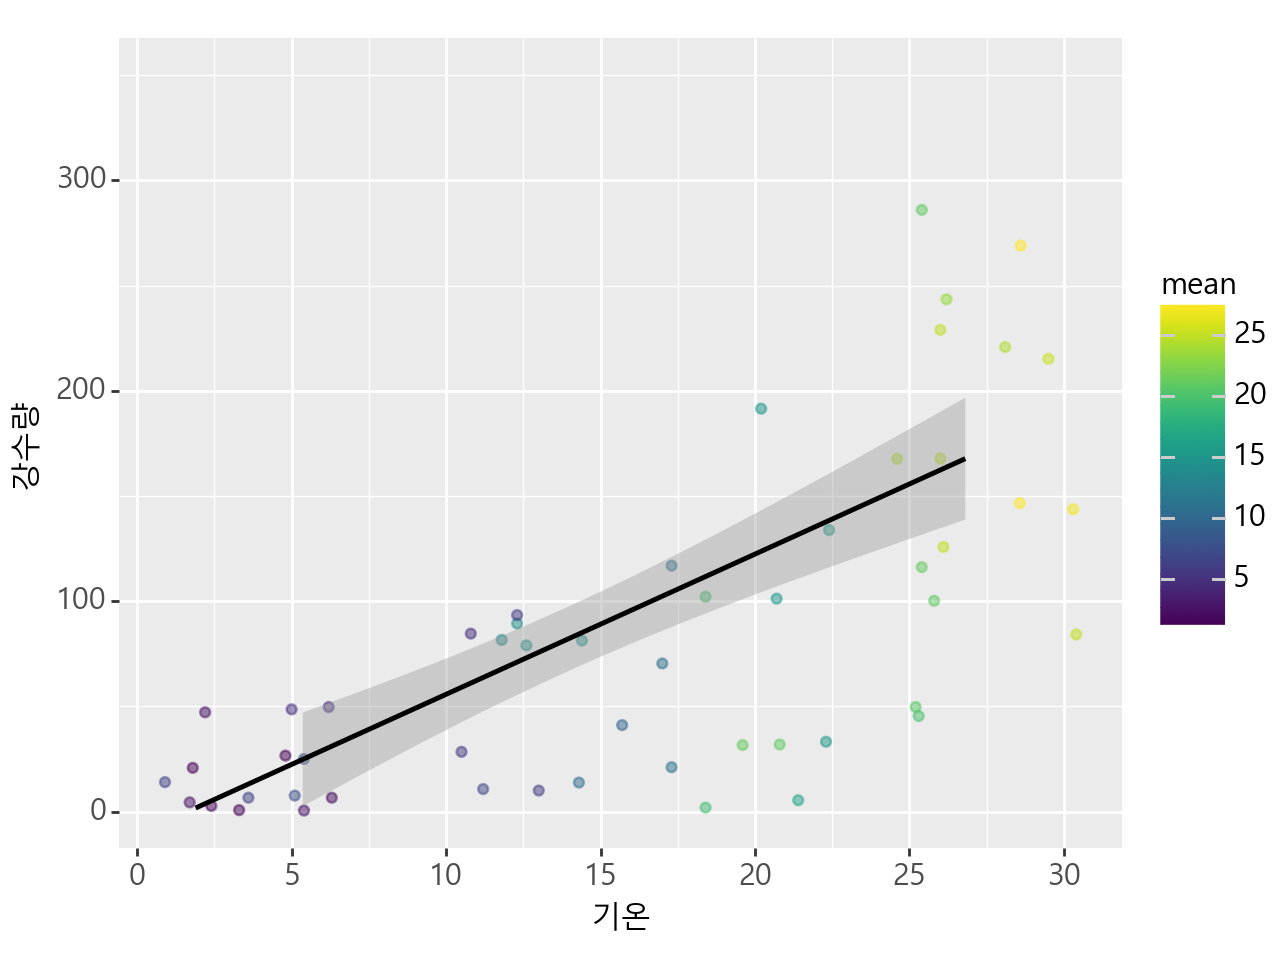

<Figure Size: (640 x 480)>

In [116]:
ggplot(incheon) + geom_point(aes(x='기온',y='강수량',colour='mean'),alpha=0.5) + geom_smooth(aes(x='mean',y='강수량', colour='mean'),method='lm') +\
scale_x_continuous(breaks=range(-10, 40, 5))  + ylim(0,350) + theme(text=element_text(fontproperties=font_name))

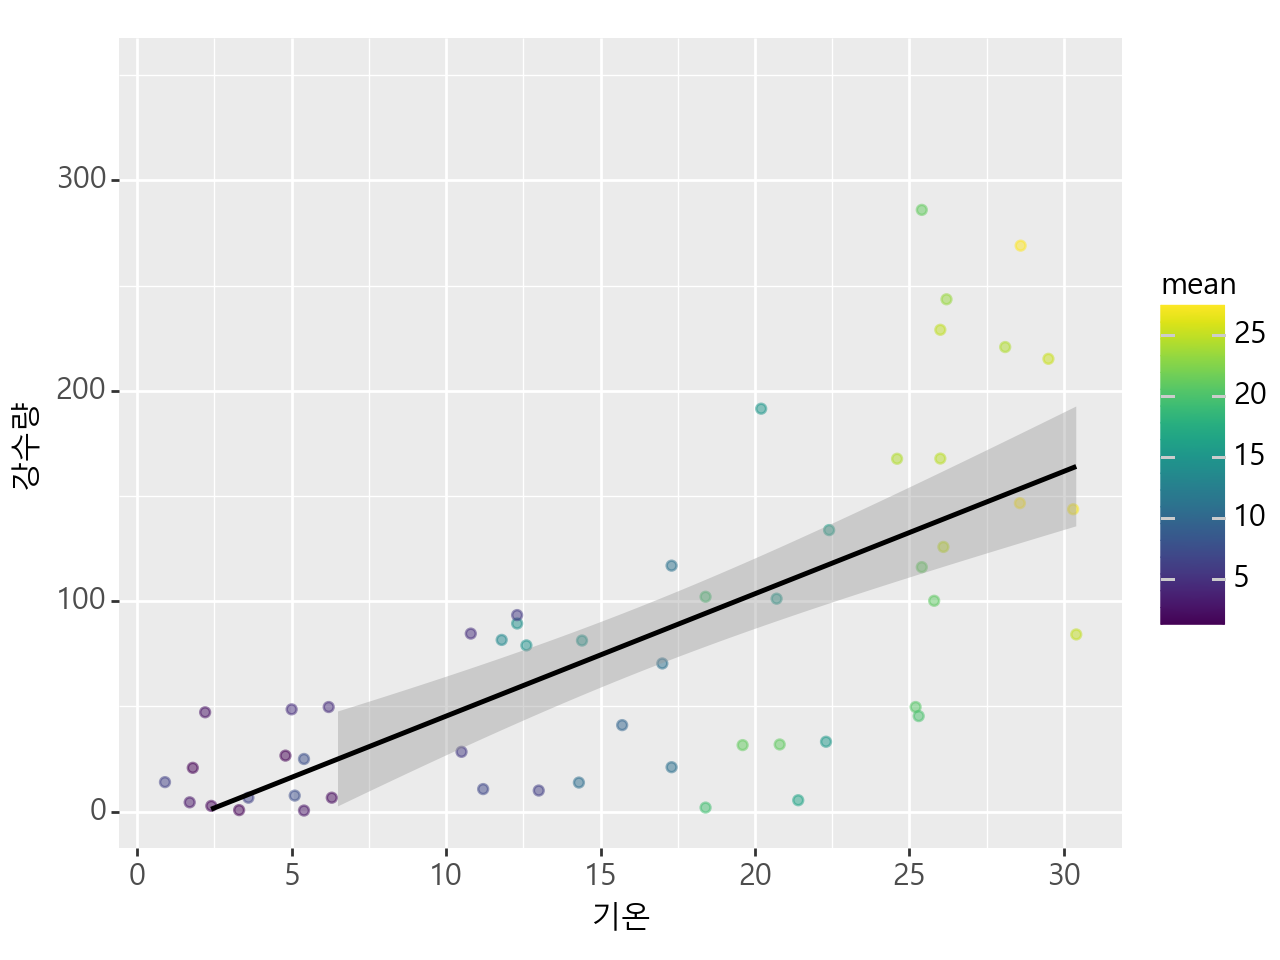

<Figure Size: (640 x 480)>

In [117]:
ggplot(incheon) + geom_point(aes(x='기온',y='강수량',colour='mean'),alpha=0.5) + geom_smooth(aes(x='기온',y='강수량'),method='lm') +\
scale_x_continuous(breaks=range(-10, 40, 5))  + ylim(0,350)  + theme(text=element_text(fontproperties=font_name))

### 군산

In [85]:
## 년도별 평균 데이터
kangsu_kunsan['year'] = kangsu_kunsan['년월'].apply(lambda x: x.split('-')[0])
kangsu_kunsan['year'] = kangsu_kunsan['year'].astype('int')  

In [88]:
kangsu_kunsan = kangsu_kunsan[kangsu_kunsan['year'] >= 2019]
kangsu_kunsan.reset_index(inplace = True, drop = True)

In [89]:
kunsan['강수량'] = kangsu_kunsan['강수량(mm)']

In [90]:
kunsan[['강수량','mean']].corr()

,강수량,mean
강수량,1.000000,0.550803
mean,0.550803,1.000000


In [91]:
kunsan_kion = pd.read_csv('군산_기온.csv',skiprows=7,encoding='cp949')

In [96]:
kunsan['기온']=kunsan_kion['평균최고기온(℃)'].fillna(kunsan_kion[kunsan_kion['년월'].str.contains('08')]['평균최고기온(℃)'].mean())

In [123]:
kunsan['수온'] = kunsan['mean']

In [125]:
kunsan[['수온','기온','강수량']].corr()

,수온,기온,강수량
수온,1.000000,0.957953,0.550803
기온,0.957953,1.000000,0.572261
강수량,0.550803,0.572261,1.000000


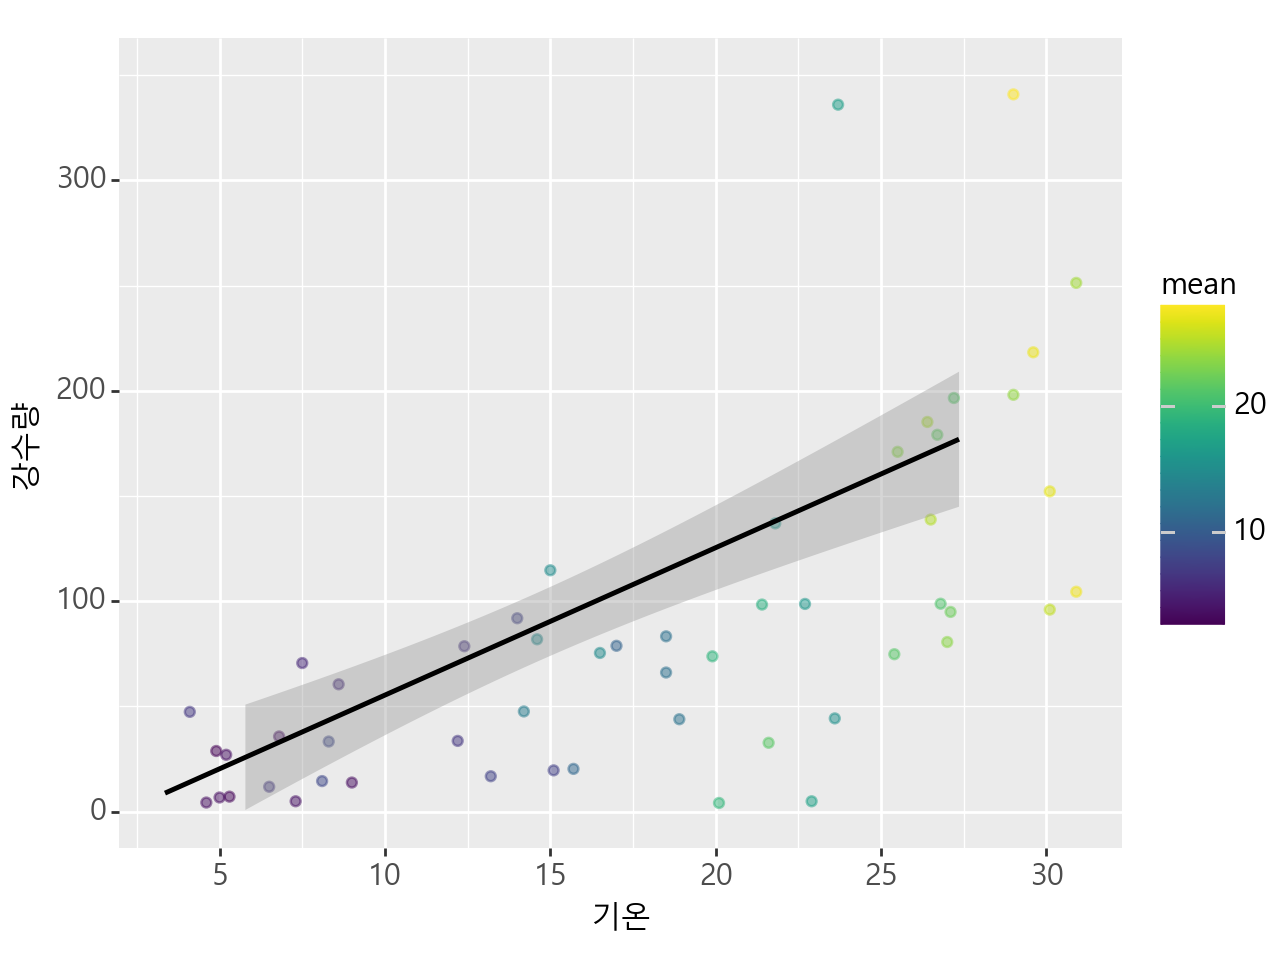

<Figure Size: (640 x 480)>

In [118]:
ggplot(kunsan) + geom_point(aes(x='기온',y='강수량',colour='mean'),alpha=0.5) + geom_smooth(aes(x='mean',y='강수량', colour='mean'),method='lm')+\
scale_x_continuous(breaks=range(-10, 40, 5))  + ylim(0,350) + theme(text=element_text(fontproperties=font_name))

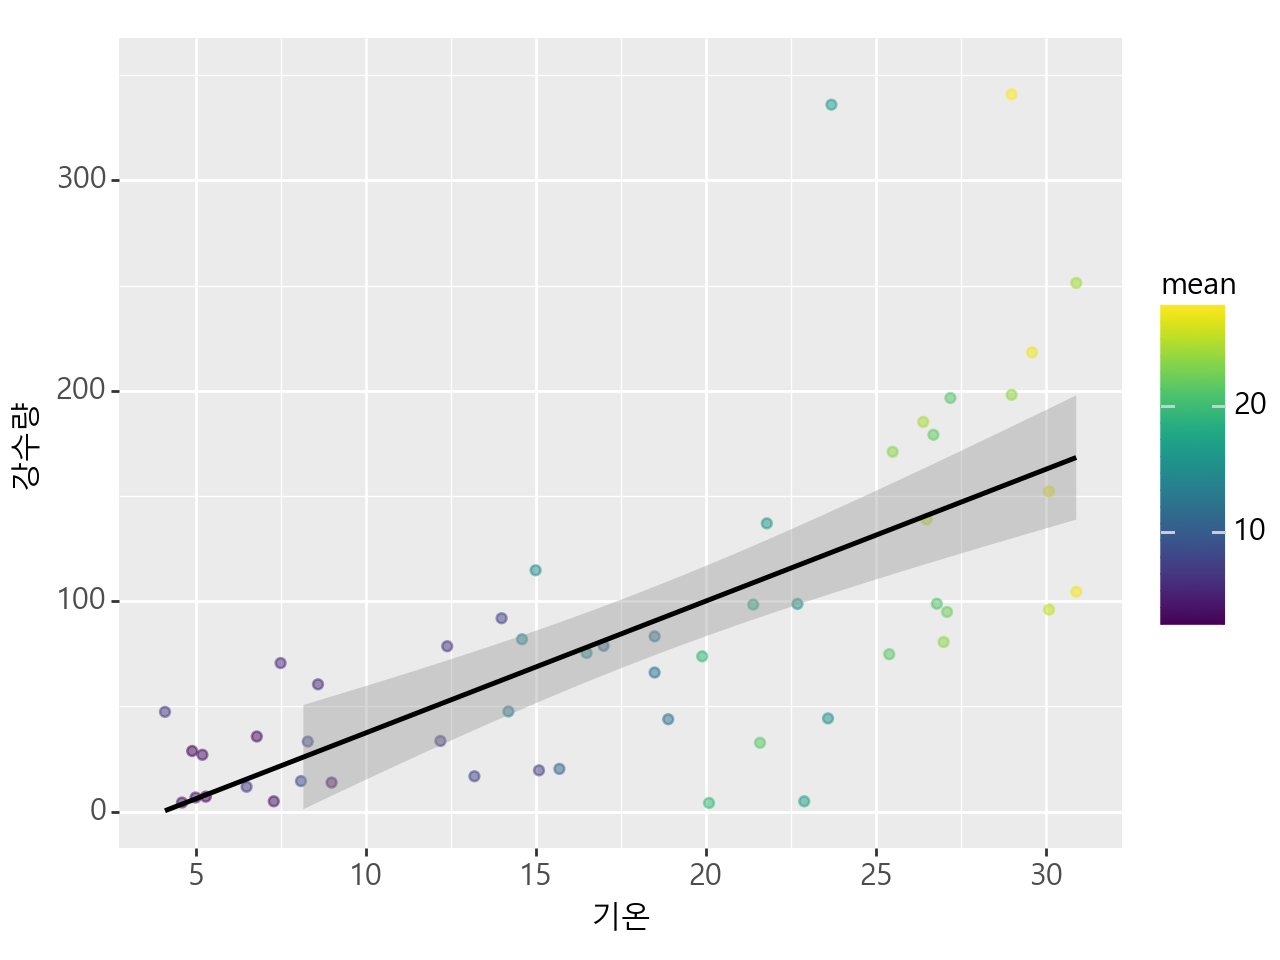

<Figure Size: (640 x 480)>

In [119]:
ggplot(kunsan) + geom_point(aes(x='기온',y='강수량',colour='mean'),alpha=0.5) + geom_smooth(aes(x='기온',y='강수량'),method='lm')+\
scale_x_continuous(breaks=range(-10, 40, 5))  + ylim(0,350) + theme(text=element_text(fontproperties=font_name))